In [1]:
from sympy import *
init_printing()

In [4]:
x, y = symbols('x y', cls=Function)
t = symbols('t', real=True)
R = ((x(t).diff(t)**2 + y(t).diff(t)**2)**(3/2) \
     / (x(t).diff(t)*y(t).diff(t, 2) - y(t).diff(t)*x(t).diff(t,2)))

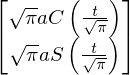

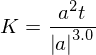

In [25]:
a, t0, t1 = symbols('a t0 t1', real=True)

curve = Matrix([
    a*sqrt(pi)*fresnelc((t)/sqrt(pi)),
    a*sqrt(pi)*fresnels((t)/sqrt(pi))
])
display(curve)

K = 1 / R.subs({x(t): curve[0], y(t): curve[1]}).doit().simplify()
display(Eq(Symbol('K'), K))

L = integrate(sqrt(curve[0].diff(t)**2 + curve[1].diff(t)**2), (t, t0, t1)).simplify()
display(Eq(Symbol('L'), L))

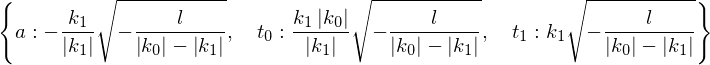

In [29]:
k0, k1, l = symbols('k0 k1 l', real=True)

with assuming(Q.positive_definite(k0), Q.positive_definite(k1), Q.is_true(k1 > k0)):
    sn = solve([
        Eq(K.subs(t, t0), abs(k0)),
        Eq(K.subs(t, t1), abs(k1)),
        Eq(L, l),
    ], (a, t0, t1), dict=True)
    display(sn[0])

In [85]:
xy = MatrixSymbol('xy', 2, 1)
th = symbols('theta')
d = {
    k0: 0.0,
    k1: 5.9114369622925669e-02,
    l: 5.7125709578755304e+00,
    
    xy: Matrix([
        34.008391843292344e+00,
        -4.3421826556979193e+00,
    ]),
    th: 7.9998293398872988e-03,
}

d2 = {
    xy: Matrix([
        39.707082592335631e+00,
        -4.6174670591660050e+00,        
    ]),
    th: -1.6084768620939371e-01,
}

d3 = {
    k0: -5.9114369622925669e-02,
    k1: -0.0,
    l: 5.7125709578755304e+00,
    xy: Matrix([
        4.5392930162567524e+01,
        -6.6292251856718263e+00
    ]),
    th: -5.1929742028899106e-01,
}

/usr/local/lib/python3.6/site-packages/sympy/plotting/plot.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  cos_theta = dot_product / (vector_a_norm * vector_b_norm)


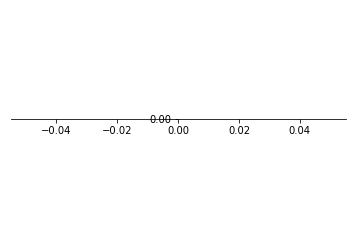

In [86]:
# Take into account the curvature sign
curve2 = Matrix([[-1, 0], [0, -sign(k1)]]) * curve

plotting.plot_parametric(
    curve2[0].subs(sn[0]).subs(d),
    curve2[1].subs(sn[0]).subs(d),
    (t, sn[0][t0].subs(d), sn[0][t1].subs(d3))
)

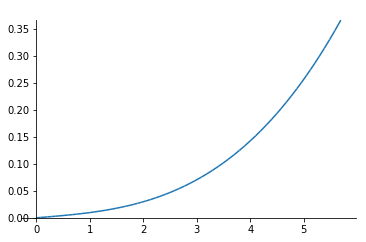

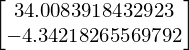

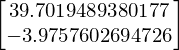

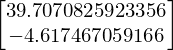

In [76]:
# Rotate by the heading
rot = Matrix([[cos(th), -sin(th)], [sin(th), cos(th)]])
curve3 = (rot * curve2)

plotting.plot_parametric(
    curve3[0].subs(sn[0]).subs(d),
    curve3[1].subs(sn[0]).subs(d),
    (t, sn[0][t0].subs(d), sn[0][t1].subs(d))
)

p0 = (curve3 + xy).subs({t: t0}).subs(sn[0]).subs(d).doit().evalf()
p1 = (curve3 + xy).subs({t: t1}).subs(sn[0]).subs(d).doit().evalf()
display(p0)
display(p1)
display(d2[xy])

In [84]:
print(sn[0])

{a: -k1*sqrt(-l/(Abs(k0) - Abs(k1)))/Abs(k1), t0: k1*sqrt(-l/(Abs(k0) - Abs(k1)))*Abs(k0)/Abs(k1), t1: k1*sqrt(-l/(Abs(k0) - Abs(k1)))}
